HELOC - Classification Model

Introduction and Project Outline:
- Our goal is to predict the classification label of unseen customer data - either approved or denied for Home Equity Lines of Credit based on certain customer attributes in their application using the Huggingface HELOC dataset.

Business Application and Impact: 
- We want to determine whether we can improve the application response time as well as maximizing the 'goods' and minimizing the 'bads' to have a positive impact on revenue generation. 
- Impacts would be optimizing the business processes, saving time and money, and reducing employee workload freeing them up for other tasks.
- Based on our research, loan applications used to be approved at the sole discretion of a Loan Officer. This person based their entire decision on whether to approve or deny a loan on their past experience and their implicit bias which could lead to misclassificiation of applicants. 
- If our model is good at classifying the rejected applications based on concrete data, then we could potentially lessen the financial impact of denying applications when they should be approved and approving applications when they should be denied. 
- This is also a much more explainable method and results could be communicated to denied applicants helping them to identify areas in which they need to improve. 
    - Ie - Needing a higher income, lowering their current debt, improving their credit score, or having a longer credit history.

Literature Review:
- Find at least two online resources such as blog posts or tutorials that provide a code-implemented project related to your topic. Summarize the key points and explain how they are relevant to your work. 
- Note that the resources should generally not be academic articles unless they include code.
- Human Learn Documentation 
    - https://koaning.github.io/human-learn/index.html
- Calmcode.io Tutorial 
    - https://calmcode.io/course/human-learn/introduction

Reference Article:
- Credit Risk Prediction - HELOC Case 
    - http://didawiki.di.unipi.it/lib/exe/fetch.php/bigdataanalytics/bda/credit_risk_prediction_heloc_case.pdf

Data Preparation:
- Data was downloaded from Huggingface
    - https://huggingface.co/datasets/mstz/heloc
- Dropped any nan values [-9,-8,-7,-6,-5,-4,-3,-2,-1], and scaled features using StandardScaler
- There were no missing values

Methodology:
- Models:
    - Boosted Trees: can capture complex patterns and interactions between features and effectively model non-linear relationships between variables. Boosted Trees can provide high predictive accuracy and are robust to overfitting, especially when properly tuned.
    - Logistic Regression: can be used to predict the probability of default based on various predictor variables. However, it may not capture complex non-linear relationships as effectively as other models.
    - K Nearest Neighbors: can be used to classify applicants as likely to default or not based on the characteristics of their nearest neighbors in the dataset. KNN is simple and intuitive but can be computationally expensive and may struggle with high-dimensional data.
- Methods: 
    - Hyperparameter tuning via GridSearchCV
    - Sklearn pipelines

In [59]:
%%capture
%pip install plotly.express
%pip install --upgrade nbformat
%pip install datasets
%pip install sklearn

In [138]:
from datasets import load_dataset

# Load the HELOC dataset
heloc_dataset = load_dataset('mstz/heloc')
df = heloc_dataset['train'].to_pandas()

In [139]:
df

estimate_of_risk  months_since_first_trade  months_since_last_trade  \
0                    55                       144                        4   
1                    61                        58                       15   
2                    67                        66                        5   
3                    66                       169                        1   
4                    81                       333                       27   
...                 ...                       ...                      ...   
10454                73                       131                        5   
10455                65                       147                       39   
10456                74                       129                        6   
10457                72                       234                       12   
10458                66                        28                        1   

       average_duration_of_resolution  number_of_satisfactory_trades  \
0                                  84                             20   
1                                  41                              2   
2                                  24                              9   
3                                  73                             28   
4                                 132                             12   
...                               ...                            ...   
10454                              57                             21   
10455                              68                             11   
10456                              64                             18   
10457                             113                             42   
10458                              17                              4   

       nr_trades_insolvent_for_over_60_days  \
0                                         3   
1                                         4   
2                                         0   
3                                         1   
4                                         0   
...                                     ...   
10454                                     0   
10455                                     0   
10456                                     1   
10457                                     2   
10458                                     0   

       nr_trades_insolvent_for_over_90_days  percentage_of_legal_trades  \
0                                         0                          83   
1                                         4                         100   
2                                         0                         100   
3                                         1                          93   
4                                         0                         100   
...                                     ...                         ...   
10454                                     0                          95   
10455                                     0                          92   
10456                                     1                         100   
10457                                     2                          96   
10458                                     0                         100   

       months_since_last_illegal_trade  maximum_illegal_trades_over_last_year  \
0                                    2                                      3   
1                                   -7                                      0   
2                                   -7                                      7   
3                                   76                                      6   
4                                   -7                                      7   
...                                ...                                    ...   
10454                               80                                      6   
10455                               28                                      6   
10456     

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   estimate_of_risk                          10459 non-null  int8 
 1   months_since_first_trade                  10459 non-null  int32
 2   months_since_last_trade                   10459 non-null  int32
 3   average_duration_of_resolution            10459 non-null  int32
 4   number_of_satisfactory_trades             10459 non-null  int16
 5   nr_trades_insolvent_for_over_60_days      10459 non-null  int16
 6   nr_trades_insolvent_for_over_90_days      10459 non-null  int16
 7   percentage_of_legal_trades                10459 non-null  int16
 8   months_since_last_illegal_trade           10459 non-null  int32
 9   maximum_illegal_trades_over_last_year     10459 non-null  int8 
 10  maximum_illegal_trades                    10459 non-null  

In [120]:
print(df.isnull().sum())

estimate_of_risk                            0
months_since_first_trade                    0
months_since_last_trade                     0
average_duration_of_resolution              0
number_of_satisfactory_trades               0
nr_trades_insolvent_for_over_60_days        0
nr_trades_insolvent_for_over_90_days        0
percentage_of_legal_trades                  0
months_since_last_illegal_trade             0
maximum_illegal_trades_over_last_year       0
maximum_illegal_trades                      0
nr_total_trades                             0
nr_trades_initiated_in_last_year            0
percentage_of_installment_trades            0
months_since_last_inquiry_not_recent        0
nr_inquiries_in_last_6_months               0
nr_inquiries_in_last_6_months_not_recent    0
net_fraction_of_revolving_burden            0
net_fraction_of_installment_burden          0
nr_revolving_trades_with_balance            0
nr_installment_trades_with_balance          0
nr_banks_with_high_ratio          

In [121]:
print(df.describe())

       estimate_of_risk  months_since_first_trade  months_since_last_trade  \
count      10459.000000              10459.000000             10459.000000   
mean          67.425758                184.205373                 8.543455   
std           21.121621                109.683816                13.301745   
min           -9.000000                 -9.000000                -9.000000   
25%           63.000000                118.000000                 3.000000   
50%           71.000000                178.000000                 5.000000   
75%           79.000000                249.500000                11.000000   
max           94.000000                803.000000               383.000000   

       average_duration_of_resolution  number_of_satisfactory_trades  \
count                    10459.000000                   10459.000000   
mean                        73.843293                      19.428052   
std                         38.782803                      13.004327   
min      

In [133]:
print(df['is_at_risk'].isnull().sum())

0


In [124]:
# 0 = Good, 1 = Bad
y = df['is_at_risk'].map({'No': 0, 'Yes': 1})
X = df.drop(columns=['is_at_risk'])

df['is_at_risk'].value_counts()

is_at_risk
1    5459
0    5000
Name: count, dtype: int64

Preliminary EDA

In [134]:
print("Check for NaN values in y:")
print(y.isnull().sum())

Check for NaN values in y:
10459


- X Variables

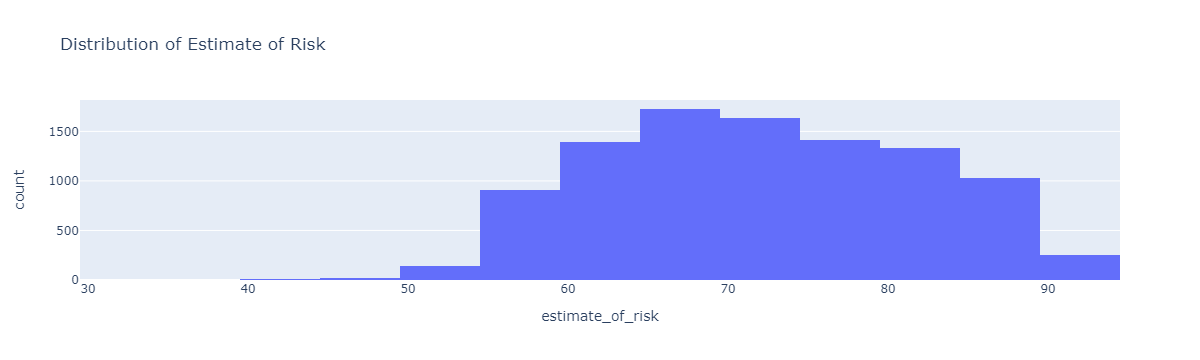

In [69]:
# Histogram of Estimate of Risk
import plotly.express as px
fig = px.histogram(df, x='estimate_of_risk', nbins=30, title='Distribution of Estimate of Risk')
fig.show()

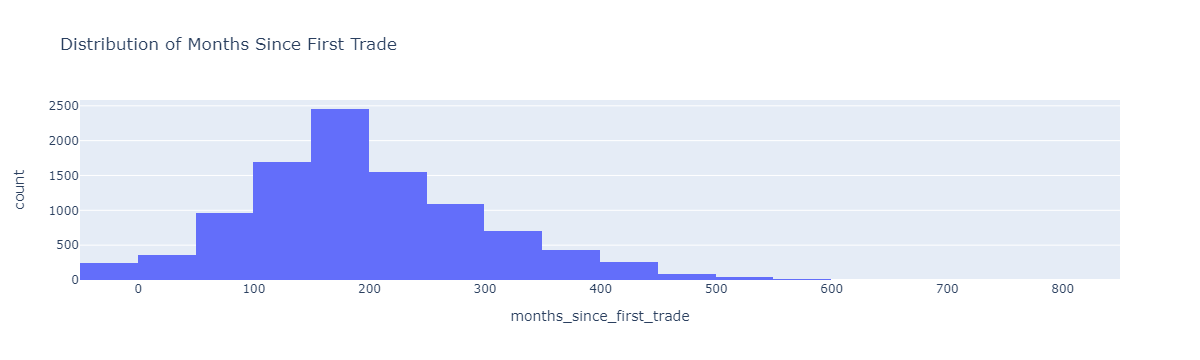

In [70]:
# Histogram of Months Since First Trade
fig = px.histogram(df, x='months_since_first_trade', nbins=30, title='Distribution of Months Since First Trade')
fig.show()


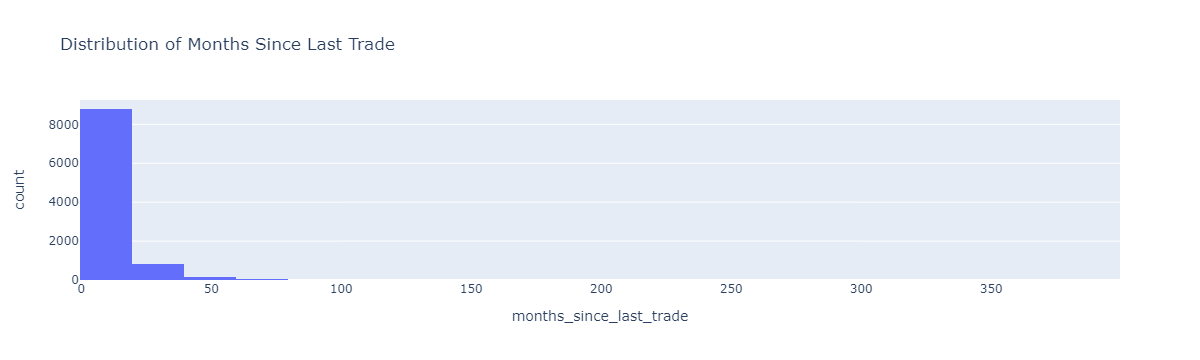

In [71]:
# Histogram of Months Since Last Trade
fig = px.histogram(df, x='months_since_last_trade', nbins=30, title='Distribution of Months Since Last Trade')
fig.show()

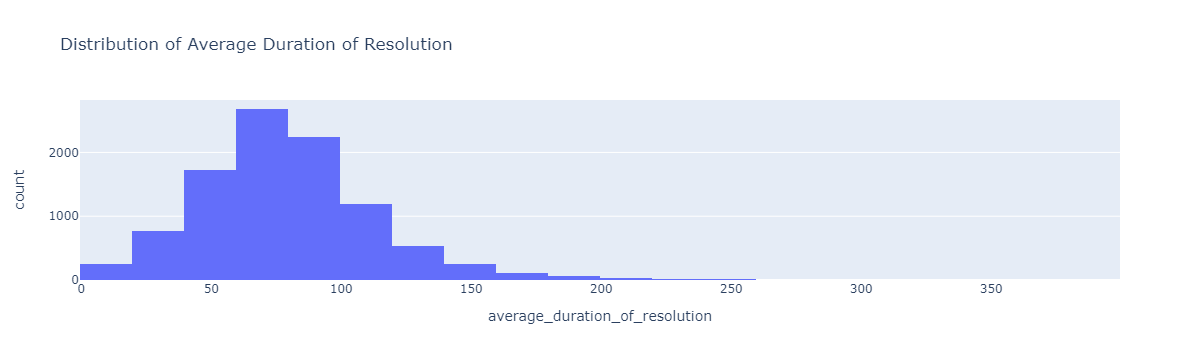

In [72]:
# Histogram of Average Duration of Resolution
fig = px.histogram(df, x='average_duration_of_resolution', nbins=30, title='Distribution of Average Duration of Resolution')
fig.show()

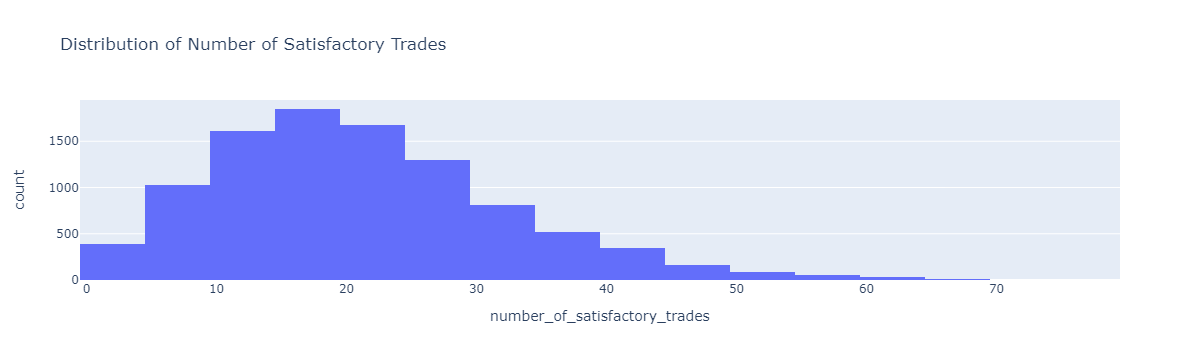

In [73]:
# Histogram of Number of Satisfactory Trades
fig = px.histogram(df, x='number_of_satisfactory_trades', nbins=30, title='Distribution of Number of Satisfactory Trades')
fig.show()

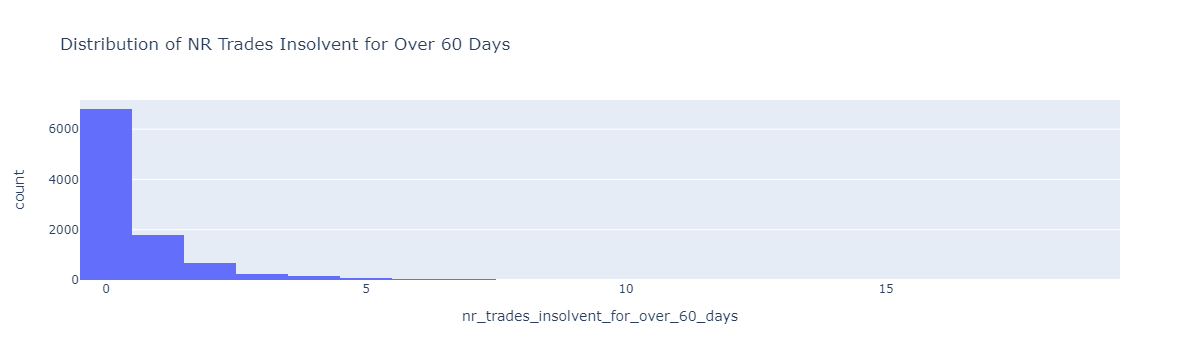

In [74]:
# Histogram of NR Trades Insolvent for Over 60 Days
fig = px.histogram(df, x='nr_trades_insolvent_for_over_60_days', nbins=30, title='Distribution of NR Trades Insolvent for Over 60 Days')
fig.show()

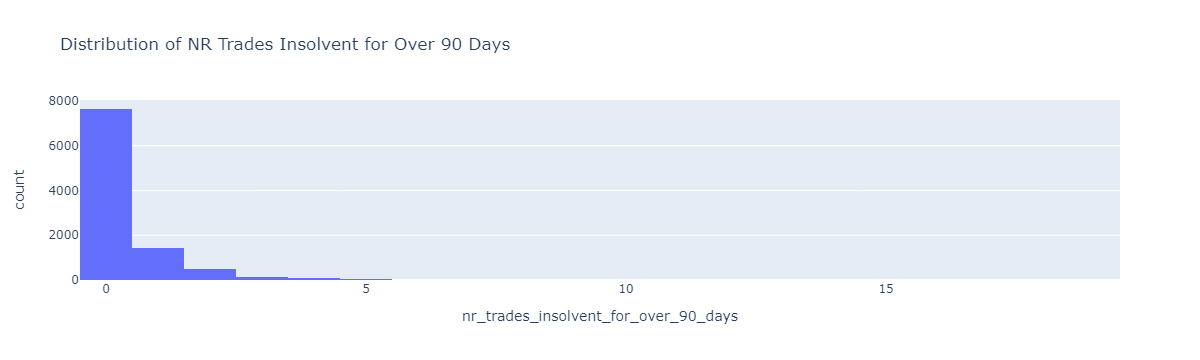

In [75]:
# Histogram of NR Trades Insolvent for Over 90 Days
fig = px.histogram(df, x='nr_trades_insolvent_for_over_90_days', nbins=30, title='Distribution of NR Trades Insolvent for Over 90 Days')
fig.show()

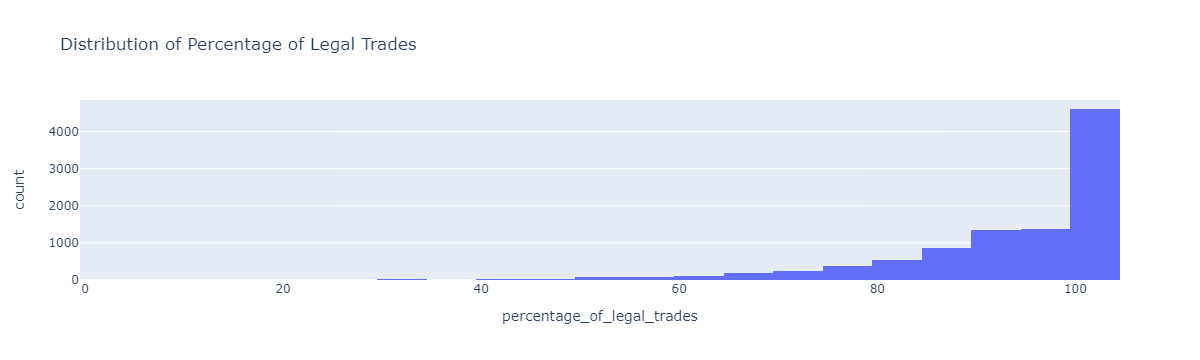

In [76]:
# Histogram of Percentage of Legal Trades
fig = px.histogram(df, x='percentage_of_legal_trades', nbins=30, title='Distribution of Percentage of Legal Trades')
fig.show()

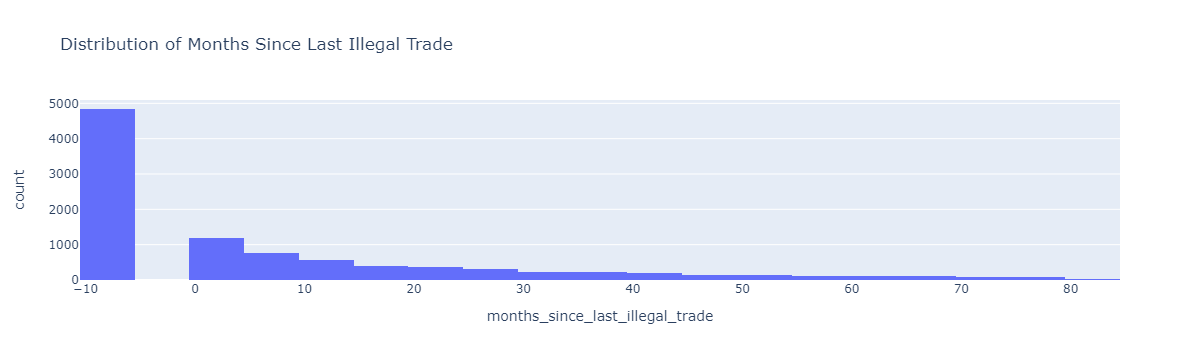

In [77]:
# Histogram of Months Since Last Illegal Trade
fig = px.histogram(df, x='months_since_last_illegal_trade', nbins=30, title='Distribution of Months Since Last Illegal Trade')
fig.show()

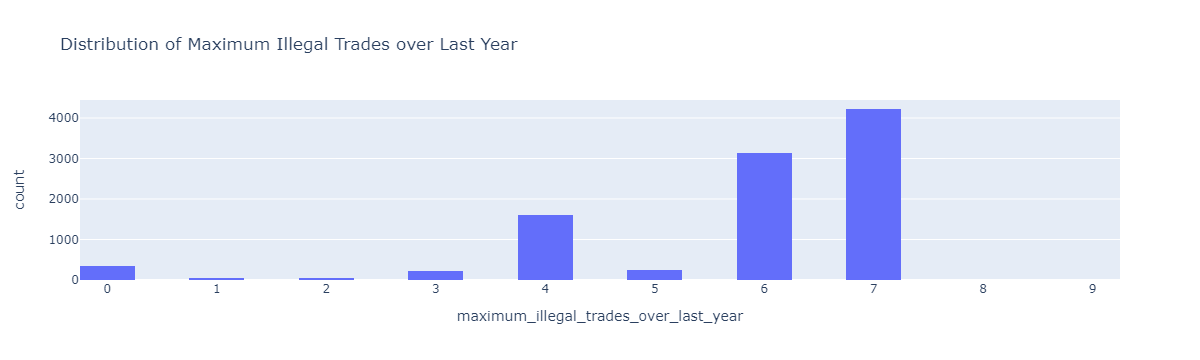

In [78]:
# Histogram of Maximum Illegal Trades over Last Year
fig = px.histogram(df, x='maximum_illegal_trades_over_last_year', nbins=30, title='Distribution of Maximum Illegal Trades over Last Year')
fig.show()

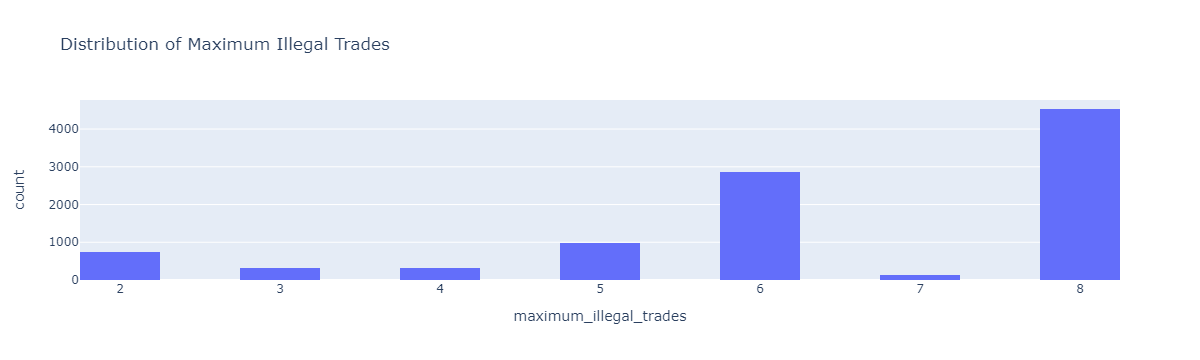

In [79]:
# Histogram of Maximum Illegal Trades
fig = px.histogram(df, x='maximum_illegal_trades', nbins=30, title='Distribution of Maximum Illegal Trades')
fig.show()

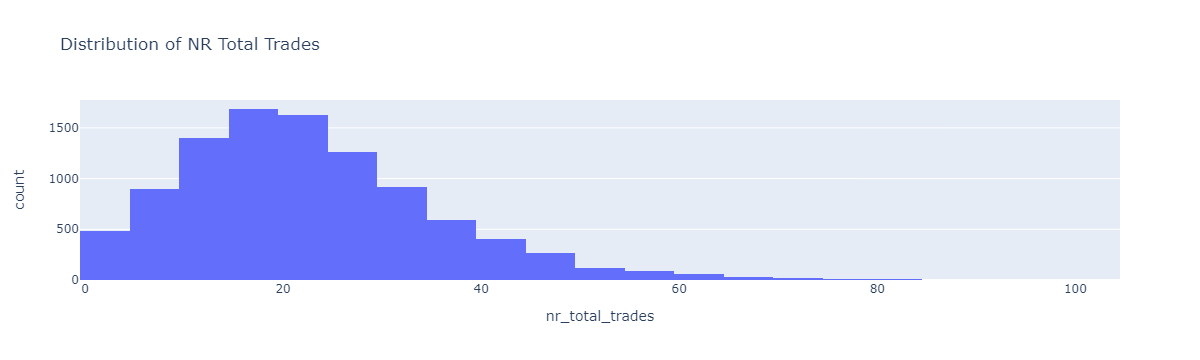

In [80]:
# Histogram of NR Total Trades
fig = px.histogram(df, x='nr_total_trades', nbins=30, title='Distribution of NR Total Trades')
fig.show()

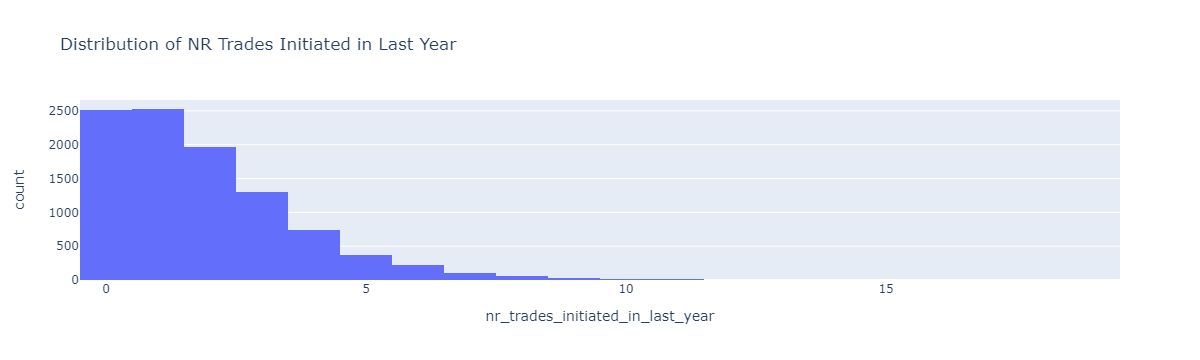

In [81]:
# Histogram of NR Trades Initiated in Last Year
fig = px.histogram(df, x='nr_trades_initiated_in_last_year', nbins=30, title='Distribution of NR Trades Initiated in Last Year')
fig.show()

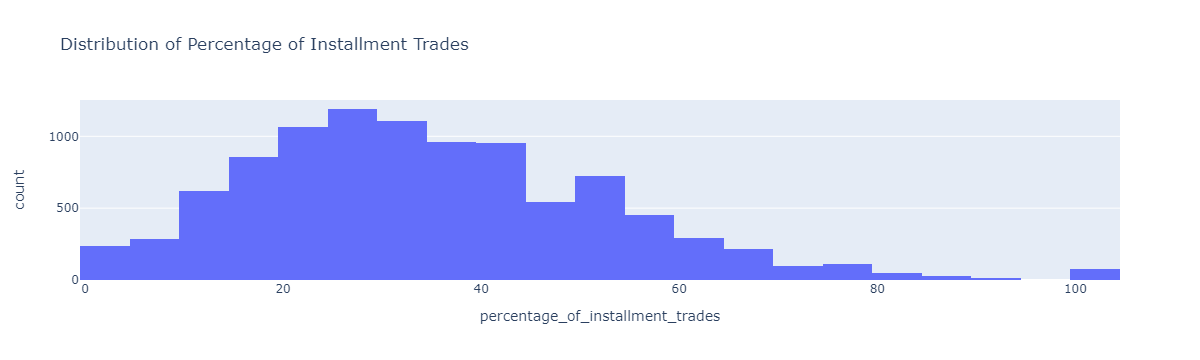

In [82]:
# Histogram of Percentage of Installment Trades
fig = px.histogram(df, x='percentage_of_installment_trades', nbins=30, title='Distribution of Percentage of Installment Trades')
fig.show()

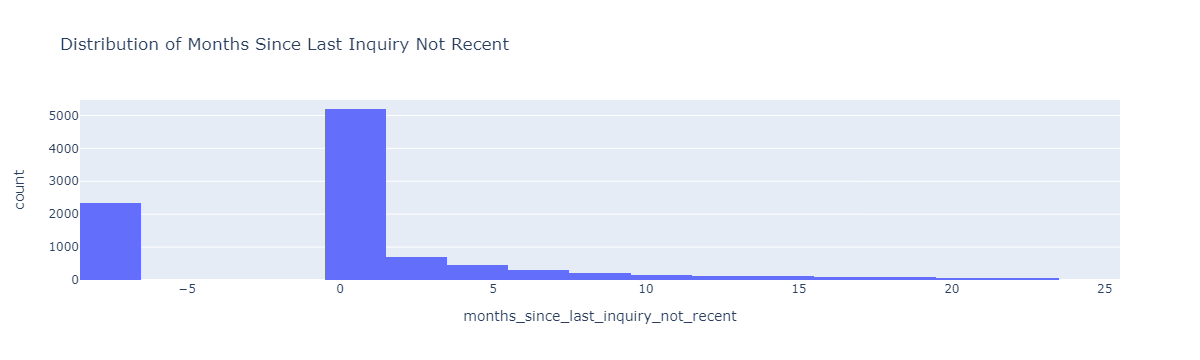

In [83]:
# Histogram of Months Since Last Inquiry Not Recent
fig = px.histogram(df, x='months_since_last_inquiry_not_recent', nbins=30, title='Distribution of Months Since Last Inquiry Not Recent')
fig.show()

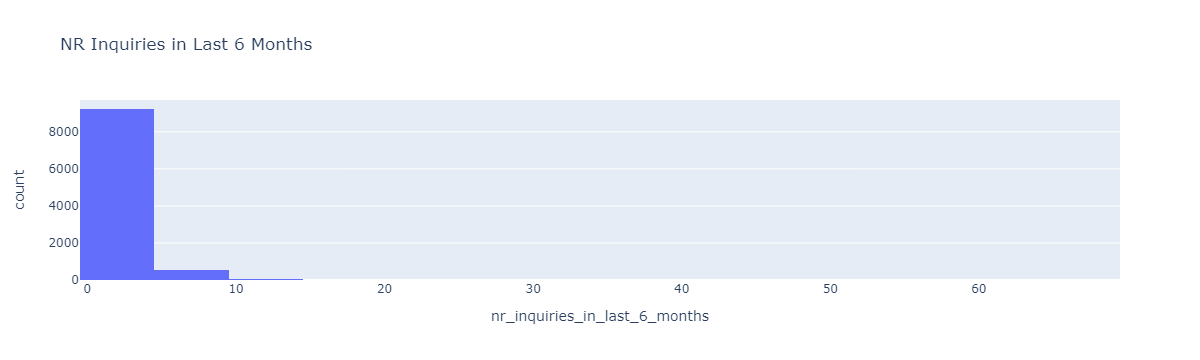

In [84]:
# Histogram of NR Inquiries in Last 6 Months
fig = px.histogram(df, x='nr_inquiries_in_last_6_months', nbins=30, title='NR Inquiries in Last 6 Months')
fig.show()

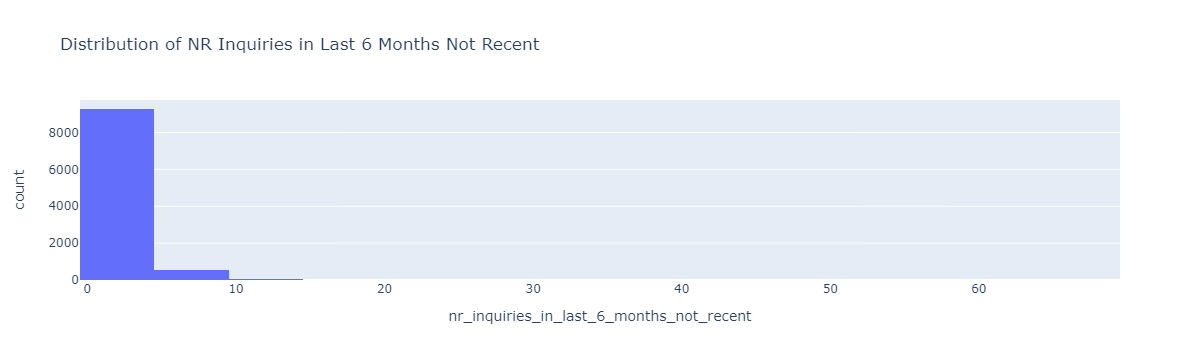

In [85]:
# Histogram of NR Inquiries in Last 6 Months Not Recent
fig = px.histogram(df, x='nr_inquiries_in_last_6_months_not_recent', nbins=30, title='Distribution of NR Inquiries in Last 6 Months Not Recent')
fig.show()

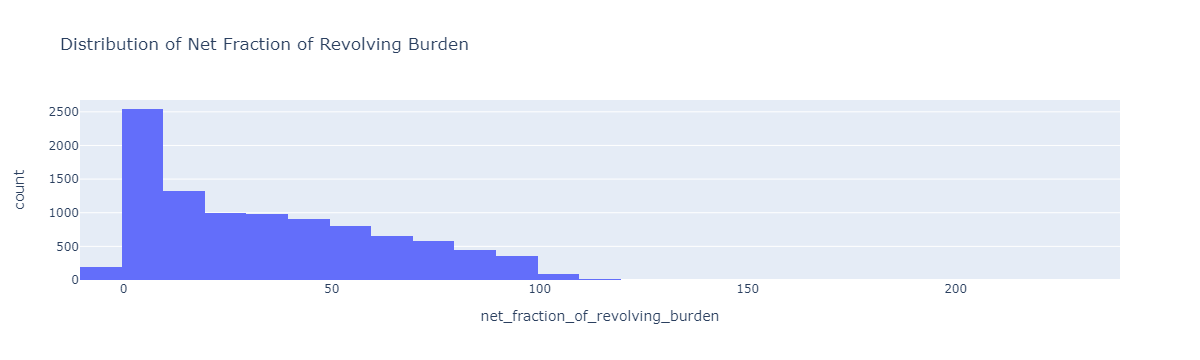

In [86]:
# Histogram of Net Fraction of Revolving Burden
fig = px.histogram(df, x='net_fraction_of_revolving_burden', nbins=30, title='Distribution of Net Fraction of Revolving Burden')
fig.show()

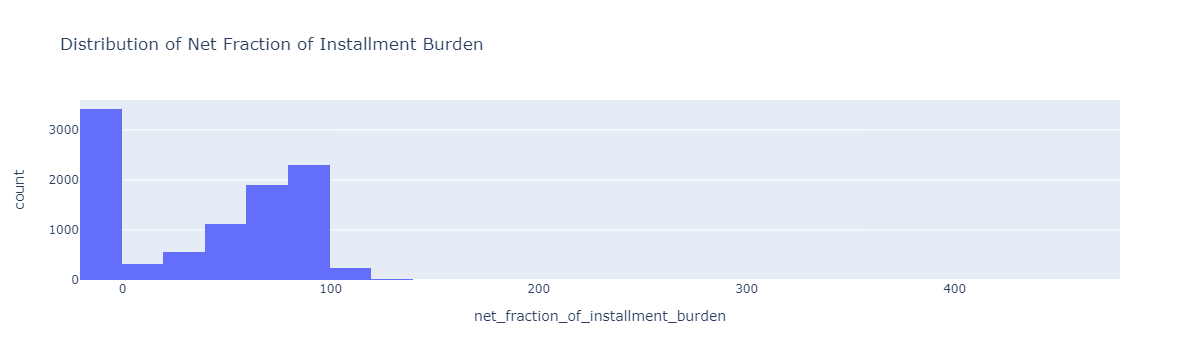

In [87]:
# Histogram of Net Fraction of Installment Burden
fig = px.histogram(df, x='net_fraction_of_installment_burden', nbins=30, title='Distribution of Net Fraction of Installment Burden')
fig.show()

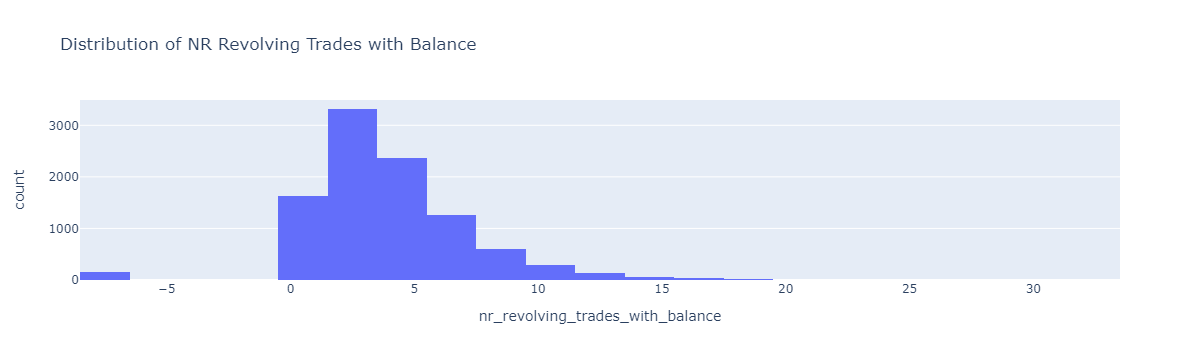

In [88]:
# Histogram of NR Revolving Trades with Balance
fig = px.histogram(df, x='nr_revolving_trades_with_balance', nbins=30, title='Distribution of NR Revolving Trades with Balance')
fig.show()

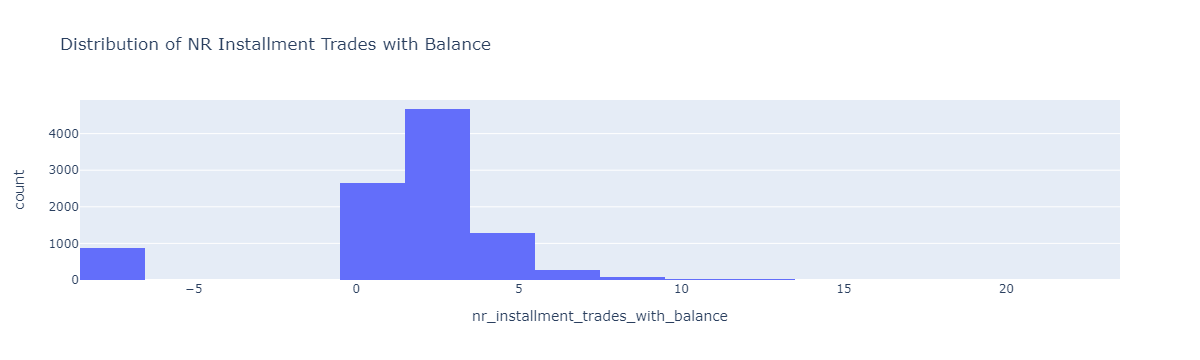

In [89]:
# Histogram of NR Installment Trades with Balance
fig = px.histogram(df, x='nr_installment_trades_with_balance', nbins=30, title='Distribution of NR Installment Trades with Balance')
fig.show()

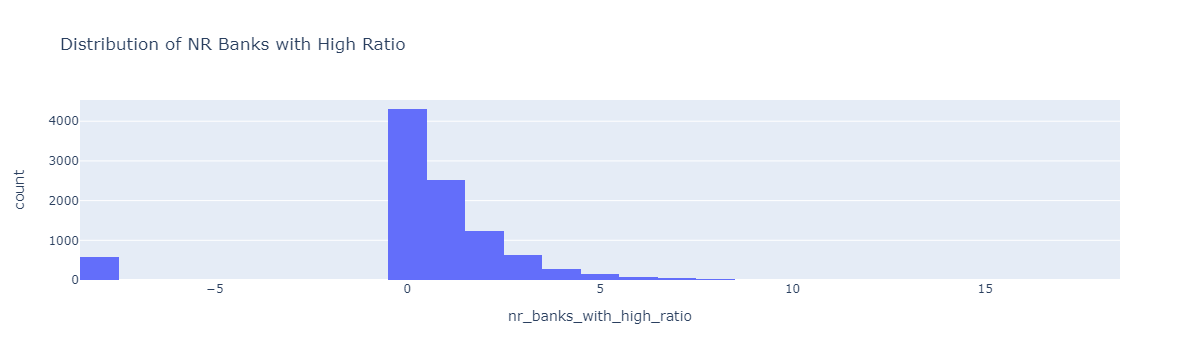

In [90]:
# Histogram of NR Banks with High Ratio
fig = px.histogram(df, x='nr_banks_with_high_ratio', nbins=30, title='Distribution of NR Banks with High Ratio')
fig.show()

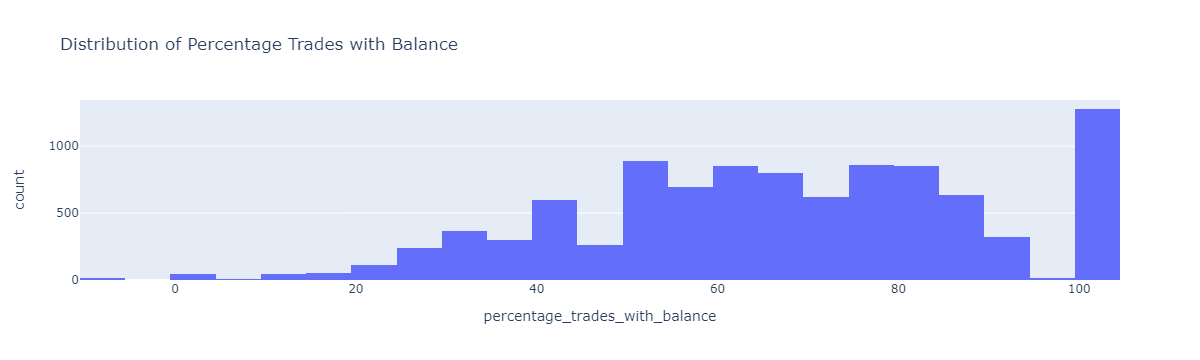

In [91]:
# Histogram of Percentage Trades with Balance
fig = px.histogram(df, x='percentage_trades_with_balance', nbins=30, title='Distribution of Percentage Trades with Balance')
fig.show()

- Y Variable

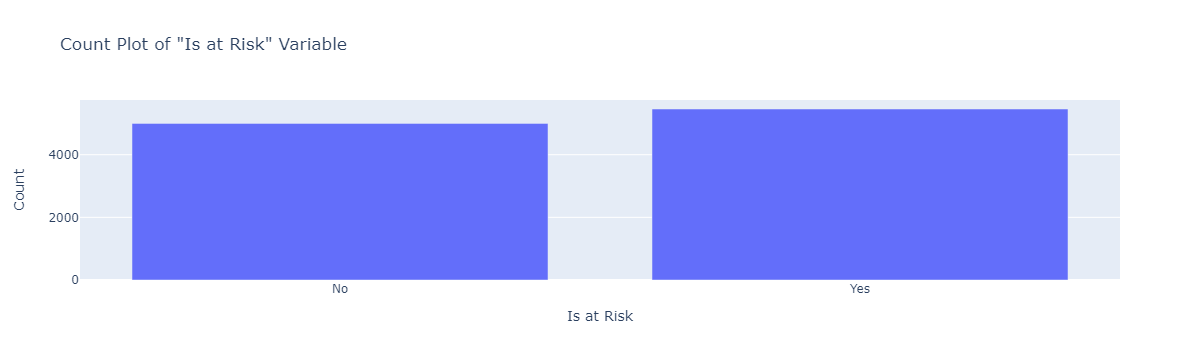

In [92]:
#Count plot of 'Is at Risk'
counts = df['is_at_risk'].value_counts().reset_index()
counts.columns = ['is_at_risk', 'count']

# Create the count plot
fig = px.bar(counts, x='is_at_risk', y='count', 
             labels={'is_at_risk': 'Is at Risk', 'count': 'Count'}, 
             title='Count Plot of "Is at Risk" Variable')

# Update the x-axis labels
fig.update_xaxes(
    tickvals=[0, 1],
    ticktext=['No', 'Yes']
)

fig.show()

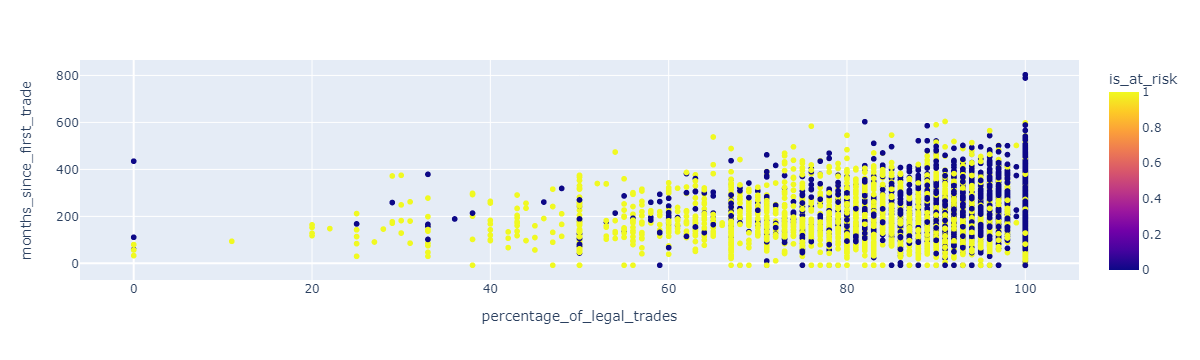

In [93]:
fig = px.scatter(df, x="percentage_of_legal_trades", y="months_since_first_trade", color="is_at_risk")
fig.show()

In [94]:
#Calculating the outliers
Q1 = df['is_at_risk'].quantile(0.25)
Q3 = df['is_at_risk'].quantile(0.75)
IQR = Q3 - Q1

lowerq = Q1
upperq = Q3

lower_bound = lowerq - (1.5 * IQR)
lower_bound
print(f"Values below {lower_bound} are lower outliers.")
upper_bound = upperq + (1.5 * IQR)
upper_bound
print(f"Values above {upper_bound} are upper outliers.")

Values below -1.5 are lower outliers.
Values above 2.5 are upper outliers.


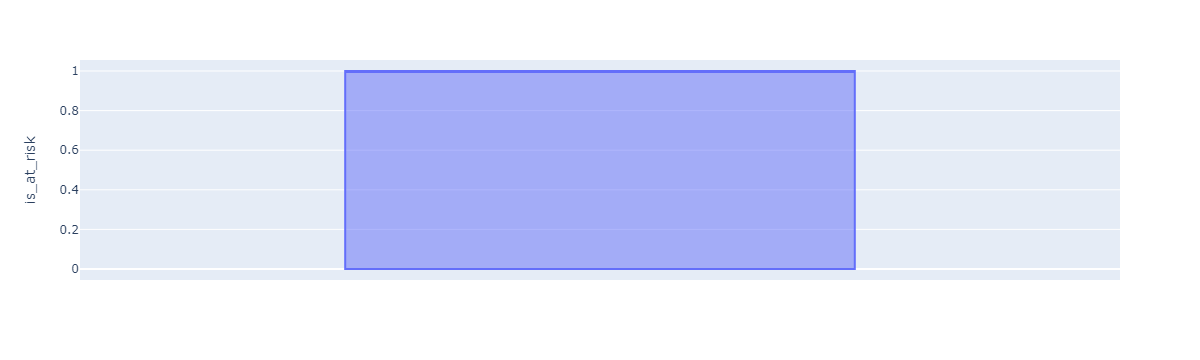

In [95]:
# identify outliers
threshold = 1.5
outliers = df[(df['is_at_risk'] < Q1 - threshold * IQR) | (df['is_at_risk'] > Q3 + threshold * IQR)]

# drop rows containing outliers
df_out = df.drop(outliers.index)

#plot
px.box(df_out, y='is_at_risk')

Initial Results:
- Conduct initial tests of your models or analysis techniques.
- Provide a summary of the results, including any initial performance metrics or insights gained.
- Discuss any challenges encountered and how you addressed them.

In [152]:
from datasets import load_dataset

# Load the HELOC dataset
heloc_dataset = load_dataset('mstz/heloc')
df = heloc_dataset['train'].to_pandas()

In [153]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [154]:
missing_values = [-9,-8,-7,-6,-5,-4,-3,-2,-1]
df.replace(missing_values, np.nan, inplace=True)

In [155]:
df = df.dropna(subset=['is_at_risk'])
y = df['is_at_risk']
X = df.drop(columns=['is_at_risk'])

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), X.columns)
    ])

# Define the models
models = {
    'GradientBoosting': GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(),
    'KNeighbors': KNeighborsClassifier()
}

# Create a dictionary to store the pipelines
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', model)])


# Define the parameter grids for each model
param_grids = {
    'GradientBoosting': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.05, 0.01]
    },
    'LogisticRegression': {
        'classifier__C': [0.1, 1.0, 10.0],
        'classifier__penalty': ['l2']
    },
    'KNeighbors': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    }
}

# Dictionary to store best estimators
best_estimators = {}

# Fit the models using GridSearchCV
for name, model in models.items():
    pipeline = pipelines[name]
    
    # Create GridSearchCV instance
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grids[name], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    
    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Store best estimator
    best_estimators[name] = grid_search.best_estimator_
    
    # Print best parameters and accuracy
    print(f'Best parameters for {name}: {grid_search.best_params_}')
    print(f'Best {name} Accuracy: {grid_search.best_score_:.4f}')

# Evaluate the best models on test data
for name, best_estimator in best_estimators.items():
    y_pred = best_estimator.predict(X_test)
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}')


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for GradientBoosting: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 50}
Best GradientBoosting Accuracy: 0.7237
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for LogisticRegression: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Best LogisticRegression Accuracy: 0.7293
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for KNeighbors: {'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}
Best KNeighbors Accuracy: 0.6922
GradientBoosting Accuracy: 0.7032
LogisticRegression Accuracy: 0.6984
KNeighbors Accuracy: 0.6807


In [158]:
# Best hyperparameters found by GridSearchCV
best_params = {
    'GradientBoosting': {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 50},
    'LogisticRegression': {'classifier__C': 0.1, 'classifier__penalty': 'l2'},
    'KNeighbors': {'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}
}

# Update pipelines with best estimators
for name, params in best_params.items():
    pipelines[name].set_params(**params)

# Retrain models on full training data
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)

# Evaluate on test data
for name, pipeline in pipelines.items():
    y_pred = pipeline.predict(X_test)
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}')

GradientBoosting Accuracy: 0.7032
LogisticRegression Accuracy: 0.6984
KNeighbors Accuracy: 0.6807


Human Learn

In [ ]:
%pip uninstall human-learn
%pip install human-learn
#%pip install --upgrade numpy

In [1]:
from hulearn.experimental.interactive import InteractiveCharts

AttributeError: module 'numpy' has no attribute 'bool8'

In [97]:
#clf = InteractiveCharts(df, labels='is_at_risk')

In [98]:
#from bokeh.io import output_notebook, show

In [99]:
#clf.add_chart(x="NumTotalTrades", y="MaxDelqEver")

Next Steps:
- Outline the steps you plan to take to refine your approach and improve your results.
- Highlight any additional data you might need, further analyses, or alternative methodologies you are considering.